/home/owen/truss-optimization/truss.py:78: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(joint.fx is not 0 or joint.fy is not 0):
/home/owen/truss-optimization/truss.py:78: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(joint.fx is not 0 or joint.fy is not 0):


0 -14.0 14 7.0 -4.0 0
1 -14.0 14 7.0 -4.0 0
Joint: 0 Fx=0, Fy=-14.0
Joint: 1 Fx=0, Fy=-28.0
Joint: 2 Fx=0, Fy=-14.0
Joint: 3 Fx=0, Fy=0


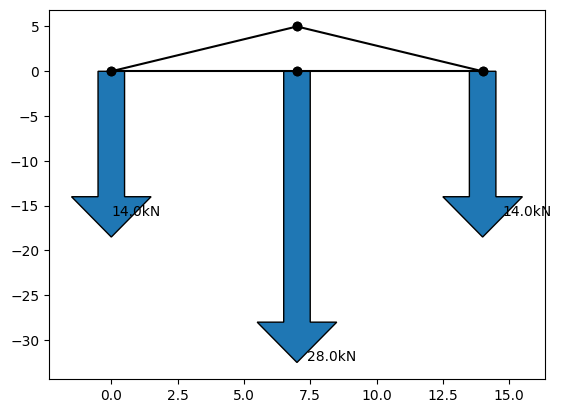

In [1]:
from truss import *

TRAIN_WEIGHT_PER_M = 4 # kN/m
BRIDGE_LENGTH = 14 # m

joints = [Joint(JointType.PIN, 0, 0), Joint(JointType.PIN, 14/2, 0), Joint(JointType.PIN, 14, 0), Joint(JointType.PIN, 14/2, 5)]
links = [(0, 1), (1, 2), (0,3), (2,3)]

train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1, 2])
forces = [train_force]

truss = Truss(joints, links, forces)
truss.apply_external_forces()

truss.print_forces()

truss.plot()

